# Starbucks Nutrition Information
Greg Welliver

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats


In [2]:
# load the dataframe
# df_exp = pd.read_csv("starbucks_drinkMenu_expanded.csv", index_col=[0])
df = pd.read_csv("starbucks_drinkMenu_expanded2.csv")

In [3]:
df.shape

(242, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [21]:
df.nunique()

Beverage_category           9
Beverage                   33
Beverage_prep              13
Calories                   48
Total Fat (g)              23
Trans Fat (g)              18
Saturated Fat (g)           4
Sodium (mg)                 9
Total Carbohydrates (g)    51
Cholesterol (mg)           75
Dietary Fibre (g)           8
Sugars (g)                 70
Protein (g)                26
Vitamin A (% DV)           11
Vitamin C (% DV)           10
Calcium (% DV)             14
Iron (% DV)                13
Caffeine (mg)              34
dtype: int64

In [5]:
df['Vitamin A (% DV)'].value_counts()

10%    43
6%     37
4%     37
15%    36
0%     27
8%     23
20%    18
25%    11
2%      5
50%     3
30%     2
Name: Vitamin A (% DV), dtype: int64

In [6]:
df['Vitamin A (% DV)'] = list(map(lambda x: x[:-1], df['Vitamin A (% DV)'].values))
df['Vitamin C (% DV)'] = list(map(lambda x: x[:-1], df['Vitamin C (% DV)'].values))
df['Calcium (% DV)'] = list(map(lambda x: x[:-1], df['Calcium (% DV)'].values))
df['Iron (% DV)'] = list(map(lambda x: x[:-1], df['Iron (% DV)'].values))


In [7]:
df['Vitamin A (% DV)'].value_counts()

10    43
6     37
4     37
15    36
0     27
8     23
20    18
25    11
2      5
50     3
30     2
Name: Vitamin A (% DV), dtype: int64

In [8]:
df = df[df['Total Fat (g)'] != '3 2']

In [9]:
#Caffeine (mg)
df['Caffeine (mg)'].value_counts()


75        37
150       34
0         34
70        14
varies    12
95        11
Varies    10
110        9
130        7
25         6
120        6
90         4
175        4
20         3
125        3
10         3
145        3
50         3
100        3
140        3
55         3
80         3
180        3
85         3
30         3
15         3
170        3
165        2
410        1
235        1
330        1
225        1
260        1
300        1
65         1
105        1
Name: Caffeine (mg), dtype: int64

In [10]:
df = df.replace({'Caffeine (mg)' : {'varies' : 'NaN', 'Varies' : 'Nan'}})


In [11]:
df['Total Fat (g)'].value_counts()

0.1    34
0      21
1.5    16
3      15
5      15
0.2    14
4      14
1      13
2.5    13
6      13
3.5    12
2      10
7      10
4.5     9
9       6
8       6
0.3     6
0.5     4
11      3
10      3
0.4     2
15      1
13      1
Name: Total Fat (g), dtype: int64

In [12]:
df['Total Fat (g)'] = df['Total Fat (g)'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        241 non-null    object 
 1   Beverage                 241 non-null    object 
 2   Beverage_prep            241 non-null    object 
 3   Calories                 241 non-null    int64  
 4   Total Fat (g)            241 non-null    float64
 5   Trans Fat (g)            241 non-null    float64
 6   Saturated Fat (g)        241 non-null    float64
 7   Sodium (mg)              241 non-null    int64  
 8   Total Carbohydrates (g)  241 non-null    int64  
 9   Cholesterol (mg)         241 non-null    int64  
 10  Dietary Fibre (g)        241 non-null    int64  
 11  Sugars (g)               241 non-null    int64  
 12  Protein (g)              241 non-null    float64
 13  Vitamin A (% DV)         241 non-null    object 
 14  Vitamin C (% DV)         2

In [14]:
df["Vitamin A (% DV)"] = df["Vitamin A (% DV)"].astype(int)
df["Vitamin C (% DV)"] = df["Vitamin C (% DV)"].astype(int)
df["Calcium (% DV)"] = df["Calcium (% DV)"].astype(int)
df["Iron (% DV)"] = df["Iron (% DV)"].astype(float)
df["Caffeine (mg)"] = df["Caffeine (mg)"].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        241 non-null    object 
 1   Beverage                 241 non-null    object 
 2   Beverage_prep            241 non-null    object 
 3   Calories                 241 non-null    int64  
 4   Total Fat (g)            241 non-null    float64
 5   Trans Fat (g)            241 non-null    float64
 6   Saturated Fat (g)        241 non-null    float64
 7   Sodium (mg)              241 non-null    int64  
 8   Total Carbohydrates (g)  241 non-null    int64  
 9   Cholesterol (mg)         241 non-null    int64  
 10  Dietary Fibre (g)        241 non-null    int64  
 11  Sugars (g)               241 non-null    int64  
 12  Protein (g)              241 non-null    float64
 13  Vitamin A (% DV)         241 non-null    int64  
 14  Vitamin C (% DV)         2

In [16]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,218.000000
mean,193.348548,2.903734,1.310788,0.037759,6.390041,128.381743,35.863071,0.804979,32.834025,6.986722,9.846473,3.630705,20.759336,7.435685,89.931193
std,102.754009,2.950443,1.642625,0.071484,8.638416,82.101585,20.741713,1.448899,19.669071,4.880120,8.111031,14.449068,14.572526,10.506992,64.589236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,51.250000
50%,180.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,75.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.000000,1.000000,43.000000,10.000000,15.000000,0.000000,30.000000,10.000000,143.750000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000


In [17]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


In [ ]:
# load the dataframe
#df_food = pd.read_csv("starbucks-menu-nutrition-food.csv", index_col=[0])
# with open('starbucks-menu-nutrition-food.csv','rb') as f:
#     contents = f.read()
# contents = contents.rstrip("\n").decode("utf-16")
# contents = contents.split("\r\n")


In [ ]:
# with open('starbucks-menu-nutrition-food.csv', encoding='utf-16') as f:
#     contents = f.read()

In [ ]:
# #food = pd.read_csv(contents, header=None)
# food = contents.to_csv()
# #contents
# # food = pd.DataFrame(contents)

In [ ]:
#df_drinks = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

In [ ]:
#df_drinks.shape

## EDA

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['popular_year'] = df['popular_year'].fillna(0)
df['popular_year'] = df['popular_year'].astype(int)

### Selection of dependent variable:

The goal of our model is to determine if a song will place on the Top Hits playlist on Spotify  in a given year.  Each of these Top Hits playlists contains 100 songs. I will refer to the songs in that appeared in these playlist as Top Hits or Top Songs throughout the notebook.

I have represented this with the Top100 variable. Let's explore the dependent variable further.

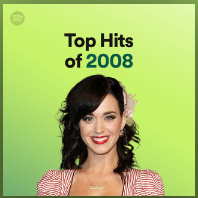 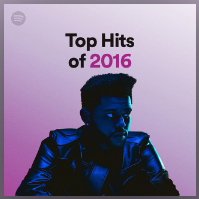

In [ ]:
# subset of tracks that made top 100
TopSongs = df[df['Top100'] == "Y"]

In [ ]:
len(TopSongs)

The data sample runs from the year 2000 through 2021, and there are 100 tracks in the Top Songs list for each year.  This means that we were able to get 88% of possible records (1863/2100) in our data retrieval.

### Artists

Let's first take a look at the Artists that earned Top Song status over this time period

In [ ]:
Artists_Grouped = TopSongs['artist_name'].value_counts().reset_index()
Artists_Grouped.index = Artists_Grouped.index + 1
Artists_Grouped.columns = ['Artist', 'Count']
Artists_Grouped.head(30)

_Observations:_

- We can see that there are five artists that had at least 20 Top Songs over this time period, and twenty-eight artists that had at least 10 Top Songs.

In [ ]:
Artists_Grouped_Year = TopSongs[['artist_name', 'popular_year']].value_counts().reset_index()
Artists_Grouped_Year.index = Artists_Grouped_Year.index + 1
Artists_Grouped_Year.columns = ['Artist', 'Year', 'Count']
#Artists_Grouped_Year
Artists_Grouped_Year.head(30)

_Observations:_

- The most Top Songs produced by an artist in any one year is five, and this has been done by five different artists.  Four Top Songs was much more frequent, having been achieved by fifteen different artists in the time period.

Let's view a time series of the top artists


In [ ]:
top5Artists = list(Artists_Grouped['Artist'])[0:5]

In [ ]:
top10Artists = list(Artists_Grouped['Artist'])[0:10]

In [ ]:
df2 = Artists_Grouped_Year.query("Artist in @top5Artists")
df2

In [ ]:
ctab = pd.crosstab([TopSongs['popular_year']], TopSongs['artist_name'])
ctab[top5Artists].plot(kind='bar', stacked=True, colormap='Accent', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Top 5 Artists: Top Hits Per Year")
plt.xticks(rotation=45)
plt.show()

It looks like Eminmen and Rihanna dominated the period from 2000 to 2010.  Let's take a closer look at that time period.

In [ ]:
FirstDecade = TopSongs.query("popular_year < 2011")
Artists_Grouped_FD = FirstDecade['artist_name'].value_counts().reset_index()
Artists_Grouped_FD.index = Artists_Grouped_FD.index + 1
Artists_Grouped_FD.columns = ['Artist', 'Count']
Artists_Grouped_FD.head(10)

### Genres

#### Let's look at the most popular genres in the Top 100s

In [ ]:
Genres_Grouped = TopSongs['track_genre'].value_counts().reset_index()
Genres_Grouped.index = Genres_Grouped.index + 1
Genres_Grouped.columns = ['Genre', 'Count']
Genres_Grouped['pct_of_total'] = Genres_Grouped.Count / Genres_Grouped.Count.sum()
#Genres_Grouped.loc[:, "pct_of_total"] = Genres_Grouped["pct_of_total"].map('{:.0%}'.format)
Genres_Grouped.loc[:, "pct_of_total"] = Genres_Grouped["pct_of_total"].map('{:,.2f}'.format)
Genres_Grouped.head(10)

We can see that pop, hip-hop, and house are the most dominant genres.

In [ ]:
# Create a pieplot
plt.rcParams["figure.figsize"] = (7,7)
plt.title("Distribution of Genres")
plt.pie(Genres_Grouped['pct_of_total'], labels=Genres_Grouped['Genre'], labeldistance=1.1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, autopct='%1.0f%%')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
;

#### Genres over time

In [ ]:
genres = ['hip-hop', 'house', 'pop', 'r&b', 'rock', 'country', 'dance', 'alternative', 'indie']
ctab = pd.crosstab([TopSongs['popular_year']], TopSongs['track_genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='Accent', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Percentage Composition Genres in Top 100 Per Year")
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.show()

_Observations on genres over time:_

- Pop and hip-hop have always maintained a sizeable portion of the Top Songs
- House music really began to hold a meaningful position starting in 2010
- Rock and Country music has faded in popularity in recent years

### Labels

#### Let's look at the Labels with the most songs in the Top 100s

In [ ]:
TopLabels = TopSongs['Label'].value_counts().reset_index()
TopLabels.index = TopLabels.index + 1
TopLabels.columns = ['Label', 'Count']
TopLabels['pct_of_total'] = TopLabels.Count / TopLabels.Count.sum()
#Genres_Grouped.loc[:, "pct_of_total"] = Genres_Grouped["pct_of_total"].map('{:.0%}'.format)
TopLabels.loc[:, "pct_of_total"] = TopLabels["pct_of_total"].map('{:,.2f}'.format)
TopLabels.head(30)

_Observations:_

- There is a fair distribution of hits among labels, with no single label containing more than 6%.  However, the above data does not account for subsidiaries of the major labels. For example, Atlantic is a subsidiary of Warner Bros, and Capitol is a subsidiary of Universal.  If we were to combine all of the subsidiaries under their Major umbrella, I suspect the Majors (Universal, Warner, Sony)  would dominate the rankings.

### Artist Country of Origin

#### Let's look at artist country of origin for Top Songs

In [ ]:
TopCountries = TopSongs['artist_country'].value_counts().reset_index()
TopCountries.index = TopCountries.index + 1
TopCountries.columns = ['Country', 'Count']
TopCountries['pct_of_total'] = TopCountries.Count / TopCountries.Count.sum()
#Genres_Grouped.loc[:, "pct_of_total"] = Genres_Grouped["pct_of_total"].map('{:.0%}'.format)
TopCountries.loc[:, "pct_of_total"] = TopCountries["pct_of_total"].map('{:,.2f}'.format)
TopCountries.head(30)

_Observations:_

- Being from a country where English is the primary language is a major advantage for an artist, with the US, UK, Canada, Australia, and Ireland all appearing in the Top 10 and making up 90% of Top Songs.  This does not necessarily map to the locale of Spotify subscribers, with Europe comprising 39% of subs, North America comprising 28%, Latin America at 21%, and the Rest of the World at 12%. 
- I'm curious if there are certain countries that over-index on Top Songs, relative to the size of their populations.  Countries with large populations like the US and Germany aren't surprising to see in the Top 10.  But there are several others that are near the top of the list that are relatively small populations.


In [ ]:
# import population data to merge with dataset
pop_detail = pd.read_csv("../Data/population_data.csv")

In [ ]:
# merge the datasets
TopCountries = TopCountries.merge(pop_detail['pop2023'], how = 'left',
                left_on = 'Country', right_on = pop_detail['country'])
TopCountries.index = TopCountries.index + 1

In [ ]:
# create 'hits_pop_ratio': the higher the ratio, the higher the number of hits relative to the population
TopCountries['hits_pop_ratio'] = (TopCountries['Count'] / TopCountries['pop2023'])*1000000
TopCountries.loc[:, 'hits_pop_ratio'] = TopCountries['hits_pop_ratio'].map('{:,.2f}'.format)

In [ ]:
TopCountries.head(30)

Places like the UK, Canada, Jamaica, and Iceland produce a lot of hits relative to their populations, each having a ratio over 3.  The US also boasts a ratio over 3 in spite of its very large population!

### Collaborations

#### Let's look at how much of a factor collaborations are in creating hits

In [ ]:
TopSongs.collaboration.value_counts()

In [ ]:
345/1863

__Of all the Top Hits, about 19% were collaborations.__

In [ ]:
#QUESTION: how create something where it would show the total count of N, Y in separate columns, by year, so that I could then calculate percentage of total?
TopCollabs2 = TopSongs.groupby(['popular_year']).collaboration.value_counts()
TopCollabs2

In [ ]:
collab_values = ['N', 'Y']
ctab = pd.crosstab([TopSongs['popular_year']], TopSongs['collaboration']).apply(lambda x: x/x.sum(), axis=1)
ctab[collab_values].plot(kind='area', stacked=True, colormap='tab20', figsize=(10,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Percentage Collaborations in Top Songs Over Time")
plt.xticks(np.arange(min(TopSongs['popular_year']), max(TopSongs['popular_year'])+1, 2.0))
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

_Observations:_

- We can see in the chart above that the prevalence of collaobrations in Top Hits has increased over time, hitting an all-time peak in 2020.
    

### Audio Features

#### Let's now take a look at audio features that Spotify provides for songs.

Most of these audio features are on a scale of 0 to 1, while others have nuanced scales specific to that characteritic  

Full deatils on each of these audio features can be found at Spotify's developer documentation: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

We'll first take a look at the audio features for all songs, not just the Top Hits.

In [ ]:
#let's select only the audio features:
df_af = df[['key', 'acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'modality','speechiness', 'tempo', 'time_signature', 'valence']]

df_af.head()

In [ ]:
df_af.key.value_counts()

In [ ]:
df_af.modality.value_counts()

In [ ]:
df_af.time_signature.value_counts()

#### Examining the data closer, it appears that key, modality, and time_signature are all categorical variables.  These should be excluded from the statistical calculations that follow.

In [ ]:
df_af = df_af.drop(columns=['key', 'modality', 'time_signature'])

In [ ]:
df_af.head()

In [ ]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df_af.corr(), annot=True, linewidths=.5, ax=ax, fmt='n')
;

### Observations on correlation matrix: 
There does not appear to be much widespread correlation between the availble variables.  The only variables with a coefficient higher than +_0.5 are:
 - Energy/Acousticness
 - Danceability/Valence
 - Loudness/Accousticness
 - Energy/Loudness
 - Acousticness/Loudness
 - Loudness/Instrumentalness
 
 It's worth noting that Loudness is included in four of these pairs (could be a candidate for removal)

In [ ]:
df_af.describe()

Let's now look at the audio features for just the Top Hits and compare them to the statistics above.

In [ ]:
TopSongs_af = TopSongs[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence']]
TopSongs_af.describe()

Interestingly, these statistics appear to vary from the total song population and the Top Hits. Just eye-balling a few, acousticness, danceability, energy, instrumentalness, and loudness at least have meaningfully different means. Hopefully this bodes well for the modeling component that will come later. 

In [ ]:
# look at atrributes over time
# are these attributes different by country
# only include song attributes here, exclude categorical

### Let's look at the distribution of numerical variables

In [ ]:
df_af.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

_Observations:_
- Only a few of these variables appear to potentially have a normal distribution.  I'll run a stats test below to check as well.
- It appears there could be the presence of outliers in duration_ms, liveness, loudness, speechiness, and tempo.


In [ ]:
#QUESTION: worthwhile digging into the potential outliers?

In [ ]:
for column_name in df_af.columns:
    data = df_af[column_name]
    output = stats.normaltest(data)
    print(column_name,": ",output)
    #print(output)

#### All of the very low p-values above indicate that none of these variables is in fact normally distributed.